I simulate the Monty Hall problem. Firstly I obtain the results for 3 doors in total and 1 open door, secondly I increase the number of doors to N and lastly I simulate what happens when the number of open doors gets higher.

In the simulation I obtain the winning probability for:
- a player that switches the door
- a player that does not switch door
- a player that arrives after the host has opened the door

In [10]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import lines
import os

# Simulation with 3 doors in total and 1 open door

In [11]:
stay_win_count = 0
switch_win_count = 0
arriveslater_win_count = 0
counts = 0
doors = [0, 0, 1]  #0=goat, 1=car
n_sim = 100000

In [12]:
for i in range (0, n_sim):
    choice = np.random.randint(0, 3)

    if choice == 0:   #the player chooses the first door
       door_opened = doors[1]
       player_1 = doors[0]     #stay with the chosen door
       player_2 = doors[2]     #switch door
       player_3 = doors[np.random.randint(0,2)*2]  #can choose between the first and the third one

    if choice == 1:   #the player chooses the second door
       door_opened = doors[0]
       player_1 = doors[1]     #stay with the chosen door
       player_2 = doors[2]     #switch door
       player_3 = doors[np.random.randint(1,3)]  #can choose between the second and the third one

    if choice == 2:   #the player chooses the third door
       door_opened = doors[0]
       player_1 = doors[2]     #stay with the chosen door
       player_2 = doors[1]     #switch door
       player_3 = doors[np.random.randint(1,3)]  #can choose between the second and the third one

    if player_1 == 1:
      stay_win_count += 1
    if player_2 == 1:
      switch_win_count += 1
    if player_3 == 1:
      arriveslater_win_count += 1

    counts += 1

In [13]:
print('Number of wins:')
print ('stay =', stay_win_count)
print('switch =', switch_win_count)
print('arriveslater =', arriveslater_win_count)
print('\n')
print('Probabilities:')
print ('stay =', stay_win_count/counts)
print('switch =', switch_win_count/counts)
print('arriveslater =', arriveslater_win_count/counts)

Number of wins:
stay = 33164
switch = 66836
arriveslater = 49771


Probabilities:
stay = 0.33164
switch = 0.66836
arriveslater = 0.49771


# Simulation with N doors in total and 1 open door

In [14]:
N_value = []
prob_stay = []
prob_switch = []
prob_arriveslater = []

# N is the number of doors
for N in range (3, 10):
   doors = np.zeros(N)
   index_car = N-1  #the car is in the last door, the host always opens the first door (expect when the player chooses it)
   doors[index_car] = 1
   stay_win_count = 0
   switch_win_count = 0
   arriveslater_win_count = 0
   counts = 0
   
   for i in range (0, n_sim):
      choice = np.random.randint(0, N)

      #if the player chooses the first door (the one that the host would open)
      if choice == 0:
         door_opened = doors[1]        #the host opens the second door

         player_1 = doors[choice]      #stay with the choosen door

         choice_of_2 = np.random.randint(2, N)     #player_2 can choose between the third and the last door
         player_2 = doors[choice_of_2]     #switch door  

         choice_of_3 = np.random.randint(0, N)    #I put the while to avoid choice_of_3 = index of door_opened
         while (choice_of_3 == 1):     
            choice_of_3 = np.random.randint(0, N)
         player_3 = doors[choice_of_3]

      # if the player doesn't choose the first door
      else:
         door_opened = doors[0]       #the host opens the first door

         player_1 = doors[choice]     #stay with the choosen door

         choice_of_2 = np.random.randint(1, N)    #I put the while to avoid choice_of_2 = choice player_1
         while (choice_of_2 == choice):     
            choice_of_2 = np.random.randint(1, N)
         player_2 = doors[choice_of_2]     #switch door  

         player_3 = doors[np.random.randint(1,N)]  #can choose between the second and the last door

      #I save the results
      if player_1 == 1:
         stay_win_count += 1
      if player_2 == 1:
         switch_win_count += 1
      if player_3 == 1:
         arriveslater_win_count += 1

      counts += 1

   #final saving
   N_value.append(N)
   prob_stay.append(stay_win_count/counts)
   prob_switch.append(switch_win_count/counts)
   prob_arriveslater.append(arriveslater_win_count/counts)
   

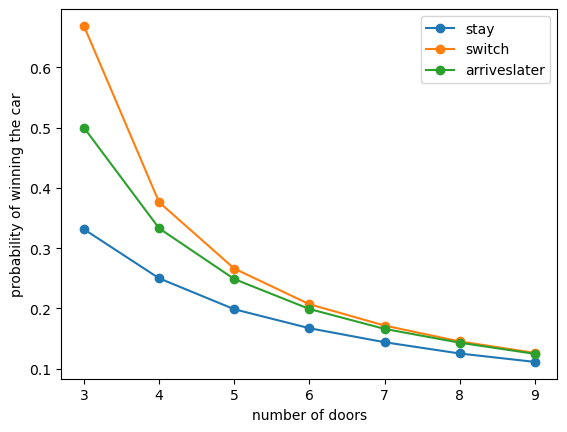

In [15]:
plt.plot(N_value, prob_stay, 'o-', label = 'stay')
plt.plot(N_value, prob_switch, 'o-', label = 'switch')
plt.plot(N_value, prob_arriveslater, 'o-', label = 'arriveslater')
plt.legend()
plt.xlabel('number of doors')
plt.ylabel('probability of winning the car')
plt.show()

# Simulation with N doors in total, varying the number of open doors

In [16]:
p_value = []
prob_stay = []
prob_switch = []
prob_arriveslater = []
N = 6

# the car is in the last door, the host always opens the first doors
# p is the index of the last open door (from 0 to (N-1)-2)
for p in range (0, N-2):
   doors = np.zeros(N)
   index_car = N-1  #the car is in the last door, the host always opens the first p doors (expect when the player chooses one of them)
   doors[index_car] = 1
   stay_win_count = 0
   switch_win_count = 0
   arriveslater_win_count = 0
   counts = 0
   
   for i in range (0, n_sim):
      choice = np.random.randint(0, N)

      #if the player chooses one of the first p doors (one that the host would open)
      if choice <= p:
         #the host opens the doors between the 0_door and the (p+1)_door (one of the doors is the one chosen)

         player_1 = doors[choice]      #stay with the chosen door

         choice_of_2 = np.random.randint(p+2, N)     #player_2 can choose between the p+2 and the last door
         player_2 = doors[choice_of_2]     #switch door  

         #player_3 can choose between the (p+1)_door and the last door. Warning:
         #I don't care where the original chosen door is, any door with a goat can play the role of the chosen one.
         #Thus it is legit to suppose that the original chosen door stays in the p+1 position:
         choice_of_3 = np.random.randint(p+1, N)    #player_3 can choose between the p+1 and the last door
         player_3 = doors[choice_of_3]

      # if the player doesn't choose the first p doors
      else:
         #the host opens the doors between the 0_door and the p_door

         player_1 = doors[choice]     #stay with the chosen door

         #player_2 opens a door between the p+1 and the last door
         choice_of_2 = np.random.randint(p+1, N)    #I put the while to avoid choice_of_2 = choice player_1
         while (choice_of_2 == choice):     
            choice_of_2 = np.random.randint(p+1, N)
         player_2 = doors[choice_of_2]     #switch door  

         player_3 = doors[np.random.randint(p+1,N)]  #player_3 can choose between the p+1 and the last door

      #I save the results
      if player_1 == 1:
         stay_win_count += 1
      if player_2 == 1:
         switch_win_count += 1
      if player_3 == 1:
         arriveslater_win_count += 1

      counts += 1

   #final saving
   p_value.append(p+1)  #I save the number of doors opened (not the index)
   prob_stay.append(stay_win_count/counts)
   prob_switch.append(switch_win_count/counts)
   prob_arriveslater.append(arriveslater_win_count/counts)
   

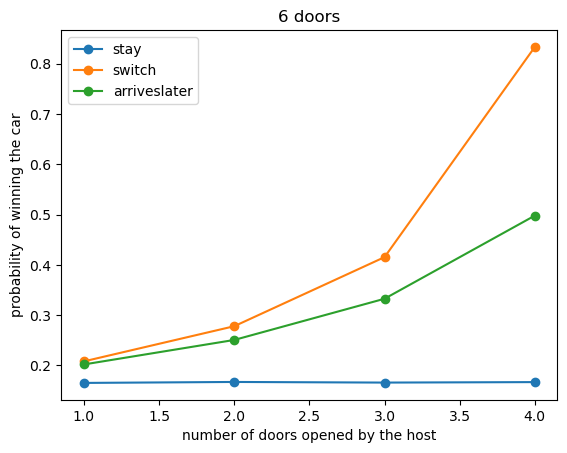

In [17]:
plt.plot(p_value, prob_stay, 'o-', label = 'stay')
plt.plot(p_value, prob_switch, 'o-', label = 'switch')
plt.plot(p_value, prob_arriveslater, 'o-', label = 'arriveslater')
plt.legend()
plt.title('%i doors' %N)
plt.xlabel('number of doors opened by the host')
plt.ylabel('probability of winning the car')
plt.show()

# Conclusions

In [18]:
for i in range (0, N-2):
    print('Number of open doors =', p_value[i])
    print('Prob of stay =', prob_stay[i])
    print('Prob of switch =', prob_switch[i])
    print('Prob of arriveslater =', prob_arriveslater[i])
    print('--------------------------------------')

Number of open doors = 1
Prob of stay = 0.16513
Prob of switch = 0.20802
Prob of arriveslater = 0.20188
--------------------------------------
Number of open doors = 2
Prob of stay = 0.16705
Prob of switch = 0.27789
Prob of arriveslater = 0.25057
--------------------------------------
Number of open doors = 3
Prob of stay = 0.16581
Prob of switch = 0.41528
Prob of arriveslater = 0.33252
--------------------------------------
Number of open doors = 4
Prob of stay = 0.16676
Prob of switch = 0.83324
Prob of arriveslater = 0.49785
--------------------------------------


These results can be explained thanks to these formulas (N=total doors, p=open doors):

$p_{stay} = \frac{1}{N}$

$p_{arriveslater} = \frac{1}{N-p}$

$p_{switch} = p_{staylooses} \cdot p_{choosing the right door} = (1-\frac{1}{N}) \cdot \frac{1}{N-1-p}$